In [1]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=16
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Detecting 1 CUDA device(s).


In [2]:
data_df = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/data_df.csv')

In [3]:
data_df

,0,1,2,3,4,5,6,7,8,9
0,0.099017,2.902559,7.909569,2.990108,-5.674712,2.387431,9.294280,7.584121,-0.870039,0.617710
1,2.383257,4.356706,7.597126,-2.858249,-4.189321,-1.940193,9.761983,4.761569,-4.746526,2.978704
2,6.123711,5.586561,3.612396,-5.341577,1.117756,-2.382801,8.495717,2.995576,-5.324989,3.215357
3,8.790827,4.554719,-2.422250,-4.186988,2.556887,1.509836,8.569451,-0.250537,-4.800271,0.920099
4,8.670151,2.439085,-5.111172,-2.105032,1.149910,4.238055,7.365397,-4.236438,-1.329313,-1.911640
...,...,...,...,...,...,...,...,...,...,...
995,-2.359435,-1.151973,-1.845417,7.145099,0.468564,-3.366962,2.925261,9.131930,3.451135,5.043717
996,-2.137420,0.945424,-0.759266,7.127123,0.406311,-2.504297,1.087555,10.437819,4.828262,0.357255
997,-0.803815,1.656646,1.621859,7.560069,-0.317561,-1.062574,0.139659,10.656675,2.783803,-3.293088
998,0.199564,2.456403,3.631453,7.281513,-1.481028,0.395368,0.498942,10.673373,-0.597343,-3.513073


--- Execution time : 39.6 seconds ---


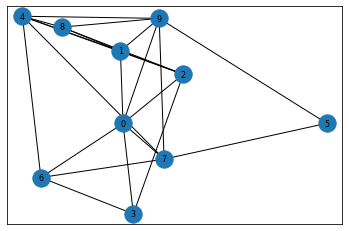

,0,1,2
0,0,1,0.017547
1,0,2,0.035535
2,0,3,0.011469
3,0,6,0.017542
4,0,7,0.019949
5,0,9,0.002067
6,1,2,0.000312
7,1,4,0.010866
8,1,8,0.009706
9,1,9,0.075634


In [4]:
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN(train_epochs=10, test_epochs=5, l1=0.1, batch_size=1000)

start_time = time.time()
ugraph = Fsgnn.predict(data_df, threshold=1e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))

--- Execution time : 260. seconds ---


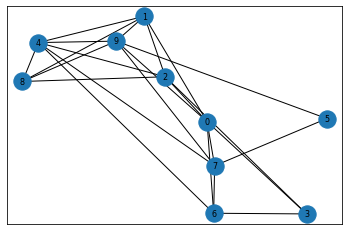

,Cause,Effect,Score
0,1,0,0.005565
1,1,2,0.030799
2,1,4,0.039779
3,1,8,0.005900
4,1,9,0.000071
5,0,3,0.052965
6,0,7,0.010950
7,0,9,0.076707
8,2,0,0.090023
9,2,3,0.007399


In [6]:
from cdt.causality.pairwise import GNN
from cdt.utils.graph import dagify_min_edge
start_time = time.time()

gnn = GNN(nruns=32, train_epochs=10, test_epochs=5, batch_size=1000)
ograph = dagify_min_edge(gnn.orient_graph(data_df, ugraph))
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

--- Execution time : 908. seconds ---


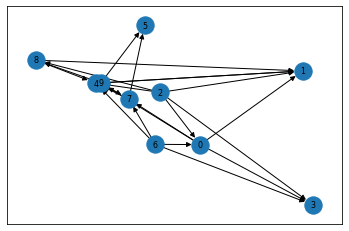

In [7]:
from cdt.causality.graph import CGNN
Cgnn = CGNN(nruns=16, train_epochs=20, test_epochs=10, batch_size=1000)
start_time = time.time()
dgraph = Cgnn.orient_directed_graph(data_df, ograph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
a = pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

a.to_csv('example_ground_truth.csv',index= False)

In [19]:
GC_set = np.zeros((10,10))

In [20]:
for i in range(len(a)):
    index1 = a['Cause'][i]
    index2 = a['Effect'][i]
    GC_set[int(index1)][int(index2)] = 1

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
  
import torch
import torch.nn as nn
import numpy as np
from copy import deepcopy

def lorenz(x, t, F):
    '''Partial derivatives for Lorenz-96 ODE.'''
    p = len(x)
    dxdt = np.zeros(p)
    for i in range(p):
        dxdt[i] = (x[(i+1) % p] - x[(i-2) % p]) * x[(i-1) % p] - x[i] + F

    return dxdt

def simulate_lorenz_96(p, T, F=10.0, delta_t=0.1, sd=0.1, burn_in=1000,
                       seed=0):
    if seed is not None:
        np.random.seed(seed)

    # Use scipy to solve ODE.
    x0 = np.random.normal(scale=0.01, size=p)
    t = np.linspace(0, (T + burn_in) * delta_t, T + burn_in)
    X = odeint(lorenz, x0, t, args=(F,))
    X += np.random.normal(scale=sd, size=(T + burn_in, p))

    # Set up Granger causality ground truth.
    GC = np.zeros((p, p), dtype=int)
    for i in range(p):
        GC[i, i] = 1
        GC[i, (i + 1) % p] = 1
        GC[i, (i - 1) % p] = 1
        GC[i, (i - 2) % p] = 1

    return X[burn_in:], GC

import pandas as pd
device = torch.device('cuda')
X_np, GC = simulate_lorenz_96(p=10, F=10, T=1000)
data_df = pd.DataFrame(X_np)

True variable usage = 40.00%
Estimated variable usage = 23.00%
Accuracy = 57.00%


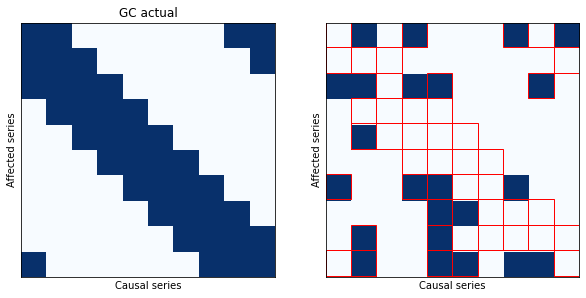

In [23]:
print('True variable usage = %.2f%%' % (100 * np.mean(GC)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_set)))
print('Accuracy = %.2f%%' % (100 * np.mean(GC == GC_set)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(GC, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(GC_set, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_set), len(GC_set), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(len(GC_set)):
    for j in range(len(GC_set)):
        if GC[i, j] != GC_set[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()